In [1]:
import pandas as pd
# read amino_acids_hydrate_data.csv
df = pd.read_csv("amino_acids_hydrate_data.csv")
df

,Amino Acid,No.,MW,pI,hI,conc,C1%,C2%,C3%,P,T
0,Glycine,1,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,2.94,274.45
1,Glycine,2,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,4.43,278.35
2,Glycine,3,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,5.93,281.15
3,Glycine,4,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,7.43,283.25
4,Glycine,5,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,8.97,284.85
...,...,...,...,...,...,...,...,...,...,...,...
205,Arginine,206,174.20,10.76,-4.5,5.00,100.0,0.0,0.0,9.84,285.90
206,Valine,207,117.15,6.02,4.2,5.00,100.0,0.0,0.0,4.60,278.60
207,Valine,208,117.15,6.02,4.2,5.00,100.0,0.0,0.0,6.20,281.40
208,Valine,209,117.15,6.02,4.2,5.00,100.0,0.0,0.0,7.58,283.00


In [2]:
df.index = df["Amino Acid"]
df.drop("Amino Acid",axis=1,inplace=True)
df.drop("No. ",axis=1,inplace=True)
df

,MW,pI,hI,conc,C1%,C2%,C3%,P,T
Amino Acid,,,,,,,,,
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,2.94,274.45
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,4.43,278.35
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,5.93,281.15
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,7.43,283.25
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,8.97,284.85
...,...,...,...,...,...,...,...,...,...
Arginine,174.20,10.76,-4.5,5.00,100.0,0.0,0.0,9.84,285.90
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,4.60,278.60
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,6.20,281.40


In [3]:
df.index

Index(['Glycine', 'Glycine', 'Glycine', 'Glycine', 'Glycine', 'Glycine',
       'Glycine', 'Glycine', 'Glycine', 'Glycine',
       ...
       'L-phenylalanine', 'L-phenylalanine', 'Arginine', 'Arginine',
       'Arginine', 'Arginine', 'Valine', 'Valine', 'Valine', 'Valine'],
      dtype='object', name='Amino Acid', length=210)

In [4]:
SMILES = {"Glycine":"C(C(=O)O)N","Alanine":"C[C@@H](C(=O)O)N","Serine":"C([C@@H](C(=O)O)N)O","Proline":"C1C[C@H](NC1)C(=O)O",
         "Arginine":"C(C[C@@H](C(=O)O)N)CNC(=N)N","Lysine":"C(CCN)C[C@@H](C(=O)O)N","L-valine":"CC(C)[C@@H](C(=O)O)N",
         "L-threonine":"C[C@H]([C@@H](C(=O)O)N)O","L-asparagine":"O=C(N)C[C@H](N)C(=O)O","L-phenylalanine":"c1ccc(cc1)C[C@@H](C(=O)O)N",
         "Valine":"CC(C)[C@@H](C(=O)O)N"}

In [5]:
SMILES

{'Glycine': 'C(C(=O)O)N',
 'Alanine': 'C[C@@H](C(=O)O)N',
 'Serine': 'C([C@@H](C(=O)O)N)O',
 'Proline': 'C1C[C@H](NC1)C(=O)O',
 'Arginine': 'C(C[C@@H](C(=O)O)N)CNC(=N)N',
 'Lysine': 'C(CCN)C[C@@H](C(=O)O)N',
 'L-valine': 'CC(C)[C@@H](C(=O)O)N',
 'L-threonine': 'C[C@H]([C@@H](C(=O)O)N)O',
 'L-asparagine': 'O=C(N)C[C@H](N)C(=O)O',
 'L-phenylalanine': 'c1ccc(cc1)C[C@@H](C(=O)O)N',
 'Valine': 'CC(C)[C@@H](C(=O)O)N'}

In [6]:
smiles = []
for sm in df.index:
    smiles.append(SMILES[sm])
len(smiles)
df_smiles = pd.Series(smiles,name="Smiles")
df_smiles

0                       C(C(=O)O)N
1                       C(C(=O)O)N
2                       C(C(=O)O)N
3                       C(C(=O)O)N
4                       C(C(=O)O)N
                  ...             
205    C(C[C@@H](C(=O)O)N)CNC(=N)N
206           CC(C)[C@@H](C(=O)O)N
207           CC(C)[C@@H](C(=O)O)N
208           CC(C)[C@@H](C(=O)O)N
209           CC(C)[C@@H](C(=O)O)N
Name: Smiles, Length: 210, dtype: object

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# function for calculating Lipinski descriptors given an input of SMILES
# notation which contains exact atomic details of molecule
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_smiles)
df_lipinski.drop("MW",axis = 1, inplace=True)
df_lipinski.index = df.index

In [9]:
df_lipinski

,LogP,NumHDonors,NumHAcceptors
Amino Acid,,,
Glycine,-0.97030,2.0,2.0
Glycine,-0.97030,2.0,2.0
Glycine,-0.97030,2.0,2.0
Glycine,-0.97030,2.0,2.0
Glycine,-0.97030,2.0,2.0
...,...,...,...
Arginine,-1.33843,5.0,3.0
Valine,0.05430,2.0,2.0
Valine,0.05430,2.0,2.0


In [10]:
df

,MW,pI,hI,conc,C1%,C2%,C3%,P,T
Amino Acid,,,,,,,,,
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,2.94,274.45
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,4.43,278.35
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,5.93,281.15
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,7.43,283.25
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,8.97,284.85
...,...,...,...,...,...,...,...,...,...
Arginine,174.20,10.76,-4.5,5.00,100.0,0.0,0.0,9.84,285.90
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,4.60,278.60
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,6.20,281.40


In [11]:
df = pd.concat([df,df_lipinski],axis=1)

In [12]:
# 划分数据集
df.columns,df.index.unique()

(Index(['MW', 'pI', 'hI', 'conc ', 'C1%', 'C2%', 'C3%', 'P', 'T', 'LogP',
        'NumHDonors', 'NumHAcceptors'],
       dtype='object'),
 Index(['Glycine', 'Alanine', 'Serine', 'Proline', 'Arginine', 'Lysine',
        'L-valine', 'L-threonine', 'L-asparagine', 'L-phenylalanine', 'Valine'],
       dtype='object', name='Amino Acid'))

In [26]:
!ls

1-s2.0-S0167732222024916-mmc1.docx
amino_acids_hydrate_data.csv
bioactivity_preprocessed_data.csv
inhibitor_amino_acids_data.csv
inhibitor_data.csv
ML-11-Inhibitors-data.ipynb
ML-12-Inhibitors-data-analysis.ipynb
ML-13-Inhibitors-amino-acids-1.ipynb
ML-14-Inhibitors-amino_acids-2.ipynb
ML-14-Inhibitors-amino_acids-3.ipynb


In [27]:
df.to_csv("amino_acids_hydrate_data_update1.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Glycine to Valine
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MW             210 non-null    float64
 1   pI             210 non-null    float64
 2   hI             210 non-null    float64
 3   conc           210 non-null    float64
 4   C1%            210 non-null    float64
 5   C2%            210 non-null    float64
 6   C3%            210 non-null    float64
 7   P              210 non-null    float64
 8   T              210 non-null    float64
 9   LogP           210 non-null    float64
 10  NumHDonors     210 non-null    float64
 11  NumHAcceptors  210 non-null    float64
dtypes: float64(12)
memory usage: 29.4+ KB


In [29]:
df.describe()

,MW,pI,hI,conc,C1%,C2%,C3%,P,T,LogP,NumHDonors,NumHAcceptors
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.339143,6.330952,-0.375238,10.280000,97.833333,1.547619,0.619048,5.224238,280.046619,-0.727708,2.342857,2.266667
std,27.089942,1.127441,2.049100,8.995459,3.243814,2.317010,0.926804,2.514749,4.187873,0.586016,0.675314,0.443273
min,75.070000,5.430000,-4.500000,1.000000,93.000000,0.000000,0.000000,1.210000,264.900000,-1.726300,2.000000,2.000000
25%,75.070000,6.020000,-1.600000,5.000000,93.000000,0.000000,0.000000,3.267500,277.275000,-0.970300,2.000000,2.000000
50%,105.090000,6.060000,-0.400000,7.770000,100.000000,0.000000,0.000000,4.600000,280.600000,-0.581800,2.000000,2.000000
75%,115.130000,6.300000,1.800000,11.420000,100.000000,5.000000,2.000000,7.400000,283.287500,-0.177000,3.000000,3.000000
max,174.200000,10.760000,4.200000,38.750000,100.000000,5.000000,2.000000,10.400000,286.750000,0.641000,5.000000,3.000000


In [30]:
x = df[['MW', 'pI', 'hI', 'conc ', 'C1%', 'C2%', 'C3%', 'P','LogP','NumHDonors', 'NumHAcceptors']]

In [31]:
y = df[['T']]

In [32]:
x

,MW,pI,hI,conc,C1%,C2%,C3%,P,LogP,NumHDonors,NumHAcceptors
Amino Acid,,,,,,,,,,,
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,2.94,-0.97030,2.0,2.0
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,4.43,-0.97030,2.0,2.0
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,5.93,-0.97030,2.0,2.0
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,7.43,-0.97030,2.0,2.0
Glycine,75.07,6.06,-0.4,2.05,100.0,0.0,0.0,8.97,-0.97030,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
Arginine,174.20,10.76,-4.5,5.00,100.0,0.0,0.0,9.84,-1.33843,5.0,3.0
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,4.60,0.05430,2.0,2.0
Valine,117.15,6.02,4.2,5.00,100.0,0.0,0.0,6.20,0.05430,2.0,2.0


In [33]:
y

,T
Amino Acid,
Glycine,274.45
Glycine,278.35
Glycine,281.15
Glycine,283.25
Glycine,284.85
...,...
Arginine,285.90
Valine,278.60
Valine,281.40


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=22)

In [35]:
# Min-Max标准化
from sklearn.preprocessing import MinMaxScaler
transfer = MinMaxScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [36]:
x_train,y_train

(array([[0.40411581, 0.16322702, 0.33333333, ..., 0.65445867, 0.        ,
         0.        ],
        [0.42449309, 0.11069418, 1.        , ..., 0.75216491, 0.        ,
         0.        ],
        [0.        , 0.11819887, 0.47126437, ..., 0.31935116, 0.        ,
         0.        ],
        ...,
        [0.14143044, 0.12757974, 0.72413793, ..., 0.48346217, 0.        ,
         0.        ],
        [0.        , 0.11819887, 0.47126437, ..., 0.31935116, 0.        ,
         0.        ],
        [0.40411581, 0.16322702, 0.33333333, ..., 0.65445867, 0.        ,
         0.        ]]),
                       T
 Amino Acid             
 Proline          273.65
 Valine           283.00
 Glycine          275.85
 Alanine          283.25
 L-phenylalanine  283.90
 ...                 ...
 Proline          268.40
 L-threonine      283.90
 Alanine          284.85
 Glycine          282.75
 Proline          280.45
 
 [147 rows x 1 columns])

In [37]:
# # 随机森林回归
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=10, random_state=22)

from sklearn import metrics
import numpy as np

estimator.fit(x_train,y_train)
y_predict = estimator.predict(x_test)

score = estimator.score(x_test, y_test)
RS = metrics.r2_score(y_test,y_predict)
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
# print("准确率为：\n", score)
print("R^2:", RS)
print("MSE:", MSE)
print("RMSE:", RMSE)

R^2: 0.953570011222434
MSE: 0.6993584920634972
RMSE: 0.8362765643395116


C:\Users\CUP\AppData\Local\Temp\ipykernel_6844\3206775809.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(x_train,y_train)


Text(0, 0.5, 'Predict Temperature (K)')

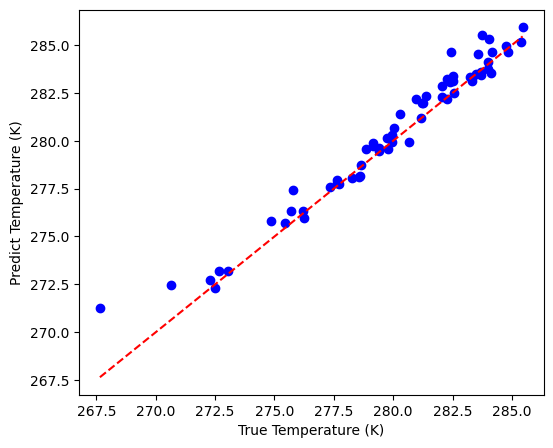

In [38]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6,5))
plt.scatter(y_test,y_predict,color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Temperature (K)")
plt.ylabel("Predict Temperature (K)")